# Yoga Pose Classification Through Convolutional Networks

## Loading Libraries

In [1]:
#using imports to load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torchvision.models import resnet34
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

%matplotlib inline

Using TensorFlow backend.


## Loading the Dataset

In [2]:
#loading the training data csv file using pandas
df = pd.read_csv("C:/Users/sukhp/Downloads/Capstone-2020/yogatrain.csv")

## Exploratory Data Analysis

In [3]:
#printing the first three rows from the dataframe
df.head(10)

,file_name,pose_id,pose_name
0,dataset/tolasana/19-0.png,69,tolasana
1,dataset/tolasana/17-0.png,69,tolasana
2,dataset/tolasana/48-0.png,69,tolasana
3,dataset/tolasana/11-0.png,69,tolasana
4,dataset/tolasana/9-0.png,69,tolasana
5,dataset/tolasana/8-0.png,69,tolasana
6,dataset/tolasana/58-0.png,69,tolasana
7,dataset/tolasana/37-0.png,69,tolasana
8,dataset/tolasana/1-0.png,69,tolasana
9,dataset/tolasana/0-0.png,69,tolasana


In [4]:
#Listing out the columns from the dataframe
cols = list(df.columns)
cols

['file_name', 'pose_id', 'pose_name']

In [5]:
df.describe()

,pose_id
count,5994.000000
mean,51.234735
std,30.465767
min,0.000000
25%,24.000000
50%,51.000000
75%,78.000000
max,106.000000


In [6]:
#Analyzing the dimensionality of the dataset
df.shape

(5994, 3)

In [7]:
df.dtypes

file_name    object
pose_id       int64
pose_name    object
dtype: object

In [8]:
df.isna().sum()

file_name    0
pose_id      0
pose_name    0
dtype: int64

In [9]:
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

print(total)
print(percent)

pose_name    0
pose_id      0
file_name    0
dtype: int64
pose_name    0.0
pose_id      0.0
file_name    0.0
dtype: float64


In [10]:
datagen=ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_dataframe(dataframe=df, directory=".", x_col="file_name", y_col="pose_name", class_mode="categorical", target_size=(32,32), batch_size=32)

C:\Users\sukhp\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 3 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 5991 validated image filenames belonging to 107 classes.


In [11]:
file_names = list(df['file_name'].values)
img_labels = list(df['pose_name'].values)
file_names[1]

'dataset/tolasana/17-0.png'

In [12]:
from PIL import ImageOps
from PIL import Image

class Resize(object):
    def __init__(self, size=224):
        self.size = size
        
    def __call__(self, im):  
        if(im.height > im.width):
            
            w = int(self.size*im.width/im.height)
            h = self.size
            pad_val = int((224-w)/2)
            pad = (224-w-pad_val,0,pad_val,0)
        else:
            h = int(self.size*im.height/im.width)
            w = self.size
            pad_val = int((224-h)/2)
            pad = (0,224-h-pad_val,0,pad_val)
        return ImageOps.expand(im.resize((w,h),resample=Image.BILINEAR), pad)

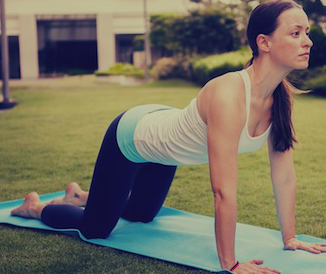

In [13]:
selection = np.random.choice(df.index,replace=False)
im = Image.open(df['file_name'][selection])
im

In [14]:
bs = 32
sz = 224
n_epochs = 1
lr = 0.001

trn_tfms = transforms.Compose([
    Resize(),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(5),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor()
])

val_tfms = transforms.Compose([
    Resize(),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

AttributeError: module 'torchvision.transforms' has no attribute 'Grayscale'

  Using cached https://files.pythonhosted.org/packages/7d/3e/2b5ddf744226159dc90a52f0d044c0de7c5ca4f42d12a350a674ebb6fb2a/torchvision-0.5.0-cp37-cp37m-win_amd64.whl


  ERROR: Could not find a version that satisfies the requirement torch==1.4.0 (from torchvision) (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2)
ERROR: No matching distribution found for torch==1.4.0 (from torchvision)


Note: you may need to restart the kernel to use updated packages.
